# Probably Approximately Correct Learning

In [1]:
%matplotlib inline

*Libraries*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom

*Global parameters*

In [3]:
num_features = 20
real_sample_size = 1900
depth = 8
degree = 3

*Paths*

In [4]:
figs_path = '../figs/'

## Decision Tree

\begin{equation}
    N \geq \frac{\ln 2}{2 \epsilon^{2}}\left(\left(2^{k}-1\right)\left(1+\log _{2} m\right)+1+\ln \delta^{-1}\right)
\end{equation}

where,

- $N$, sample size
- $k$, depth of the tree
- $m$, number of features
- $\epsilon$, true error bound
- $\delta$, training error bound

In [5]:
def pac_bound_decision_tree(num_features, depth, epsilon, delta):
    """
    PAC bound of a decision tree

    Parameters
    ----------
    num_features : int
        number of features
    depth : int
        depth of the tree
    epsilon : float
        true error bound
    delta : float
        training error bound
    """
    return (np.log(2) / (2 * epsilon ** 2 )) * ((2 ** depth - 1) * (1 + np.log2(num_features)) + 1 + np.log(delta ** -1))

*Example*

In [6]:
for delta, epsilon in [(0.02, 0.05), (0.07, 0.10), (0.10, 0.15)]:
    sample_size = pac_bound_decision_tree(num_features, depth, epsilon, delta)
    print('delta = {:.2f}, epsilon = {:.2f}, m >= {:.2f}'.format(delta, epsilon, sample_size))

delta = 0.02, epsilon = 0.05, m >= 188813.80
delta = 0.07, epsilon = 0.10, m >= 47160.03
delta = 0.10, epsilon = 0.15, m >= 20954.52


## Support-Vector Machine

\begin{equation}
    N \geq \max \left\{\frac{4}{\epsilon} \ln \left(\frac{2}{\delta}\right), \frac{8 \mathrm{VC}}{\epsilon} \ln \left(\frac{13}{\epsilon}\right)\right\}
\end{equation}

where,

- $N$, sample size
- $VC$, classifier's Vapnik-Chervonenkis dimension
- $\epsilon$, true error bound
- $\delta$, training error bound

In [7]:
def pac_bound_svm(num_features, vc, epsilon, delta):
    """
    PAC bound of a support-vector machine

    Parameters
    ----------
    num_features : int
        number of features
    vc : int
        vapnik-chervonenkis dimension
    epsilon : float
        true error bound
    delta : float
        training error bound
    """
    return max((4 / epsilon) * np.log(2 / delta), (8 * vc / epsilon) * np.log(13 / epsilon))

*Example (Linear SVM)*

In [8]:
# VC-dimension
vc_linear = num_features + 1

# Compute sample sizes
for delta, epsilon in [(0.02, 0.05), (0.07, 0.10), (0.10, 0.15)]:
    sample_size = pac_bound_svm(num_features, vc_linear, epsilon, delta)
    print('delta = {:.2f}, epsilon = {:.2f}, m >= {:.2f}'.format(delta, epsilon, sample_size))

delta = 0.02, epsilon = 0.05, m >= 18683.89
delta = 0.07, epsilon = 0.10, m >= 8177.46
delta = 0.10, epsilon = 0.15, m >= 4997.52


*Example (Polynomial SVM)*

In [9]:
# VC-dimension
vc_poly = binom(num_features + degree, degree)

# Compute sample sizes
for delta, epsilon in [(0.02, 0.05), (0.07, 0.10), (0.10, 0.15)]:
    sample_size = pac_bound_svm(num_features, vc_poly, epsilon, delta)
    print('delta = {:.2f}, epsilon = {:.2f}, m >= {:.2f}'.format(delta, epsilon, sample_size))

delta = 0.02, epsilon = 0.05, m >= 1575674.75
delta = 0.07, epsilon = 0.10, m >= 689632.28
delta = 0.10, epsilon = 0.15, m >= 421457.32


## Sample Size Comparison

*Parameters*

In [10]:
steps = 100
low_delta, high_delta = 0.01, 0.30
bound_diff = 0.20

*Compute sample sizes*

In [11]:
delta_range = np.linspace(low_delta, high_delta, steps)
fixed_sample_size = np.array(steps * [real_sample_size])
size_decision_tree = np.array(steps * [0])
size_svm_linear = np.array(steps * [0])
size_svm_polynomial = np.array(steps * [0])

for i, delta in enumerate(delta_range):
    epsilon = delta + bound_diff
    size_decision_tree[i] = pac_bound_decision_tree(num_features, depth, epsilon, delta)
    size_svm_linear[i] = pac_bound_svm(num_features, vc_linear, epsilon, delta)
    size_svm_polynomial[i] = pac_bound_svm(num_features, vc_poly, epsilon, delta)

*Compare sample sizes*

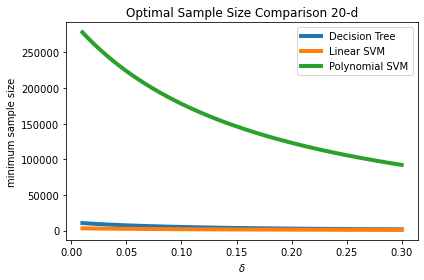

In [12]:
plt.figure()
plt.plot(delta_range, size_decision_tree, linewidth=4, label='Decision Tree')
plt.plot(delta_range, size_svm_linear, linewidth=4, label='Linear SVM')
plt.plot(delta_range, size_svm_polynomial, linewidth=4, label='Polynomial SVM')
plt.ylabel('minimum sample size')
plt.xlabel(r'$\delta$')
plt.title('Optimal Sample Size Comparison {}-d'.format(num_features))
plt.legend()
plt.tight_layout()
plt.savefig(figs_path + 'optimal_sample_size_comparison_{}d.pdf'.format(num_features))
plt.show()

*Plot decision tree optimal sample size*

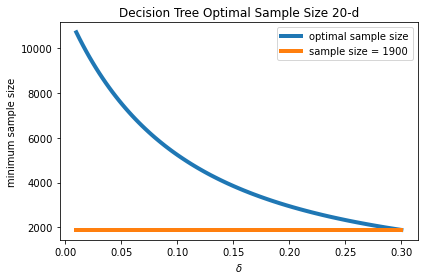

In [13]:
plt.figure()
plt.plot(delta_range, size_decision_tree, linewidth=4, label='optimal sample size')
plt.plot(delta_range, fixed_sample_size, linewidth=4, label='sample size = {}'.format(real_sample_size))
plt.ylabel('minimum sample size')
plt.xlabel(r'$\delta$')
plt.title('Decision Tree Optimal Sample Size {}-d'.format(num_features))
plt.legend()
plt.tight_layout()
plt.savefig(figs_path + 'decision_tree_optimal_sample_size_{}d.pdf'.format(num_features))
plt.show()

*Plot linear SVM optimal sample size*

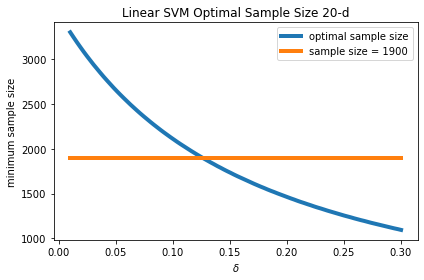

In [14]:
plt.figure()
plt.plot(delta_range, size_svm_linear, linewidth=4, label='optimal sample size')
plt.plot(delta_range, fixed_sample_size, linewidth=4, label='sample size = {}'.format(real_sample_size))
plt.ylabel('minimum sample size')
plt.xlabel(r'$\delta$')
plt.title('Linear SVM Optimal Sample Size {}-d'.format(num_features))
plt.legend()
plt.tight_layout()
plt.savefig(figs_path + 'linear_svm_optimal_sample_size_{}d.pdf'.format(num_features))
plt.show()

*Plot polynomial SVM optimal sample size*

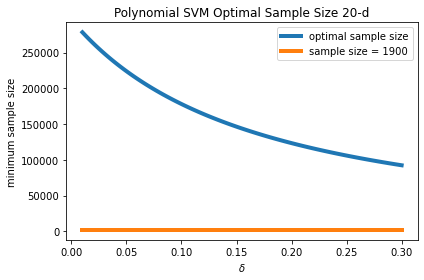

In [15]:
plt.figure()
plt.plot(delta_range, size_svm_polynomial, linewidth=4, label='optimal sample size')
plt.plot(delta_range, fixed_sample_size, linewidth=4, label='sample size = {}'.format(real_sample_size))
plt.ylabel('minimum sample size')
plt.xlabel(r'$\delta$')
plt.title('Polynomial SVM Optimal Sample Size {}-d'.format(num_features))
plt.legend()
plt.tight_layout()
plt.savefig(figs_path + 'poly_svm_optimal_sample_size_{}d.pdf'.format(num_features))
plt.show()